# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')
df = pd.read_csv(r'C:\Users\brean\Documents\BerkAIML\bank-additional-full.csv', sep = ';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [33]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Business Objective: <br>
Based on the provided dataset and its structure, the business objective for this task appears to be:
To predict whether a client will subscribe to a term deposit (bank product) based on various demographic, economic, and campaign-related factors <br>.
This objective is derived from the following observation<br>s1. :
The target variable 'y' in the dataset represents whether a client subscribed to a term deposit (yes/no<br>2. ).
The dataset contains various features about clients, including age, job, marital status, education, and financial informati<br>3. on.
There are campaign-related variables such as 'duration', 'campaign', 'pdays', and 'previous', suggesting that this data is collected during marketing campai<br>4. gns.
Economic indicators like 'emp.var.rate', 'cons.price.idx', 'cons.conf r3m', and 'nr.employed' are included, which could influence a client's decision to subsc<br>ribe.
The bank aims to use this data to develop a predictive model that can identify potential customers who are more likely to subscribe to a term deposit. 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [34]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

# Convert the target variable to binary (0 and 1)
df_encoded['y'] = df_encoded['y'].map({'no': 0, 'yes': 1})

# Split features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [40]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

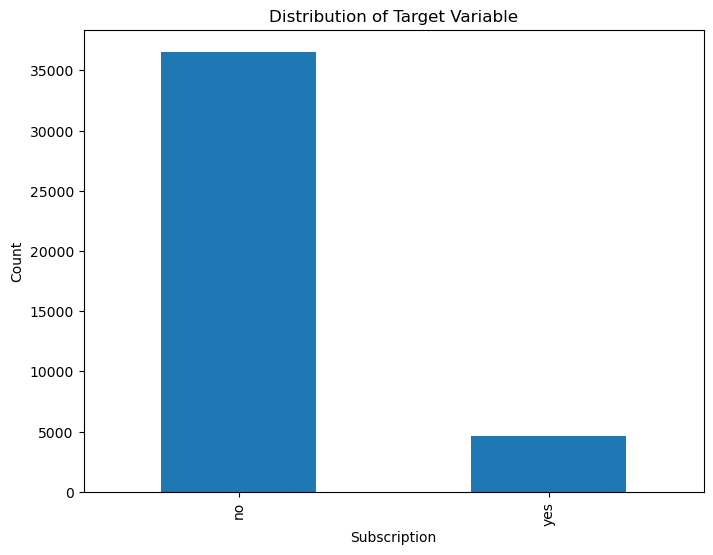

In [44]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
df['y'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.show()


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [52]:
# Count the occurrences of each class
class_counts = df['y'].value_counts()

# Calculate the total number of samples
total_samples = len(df)

# Calculate the accuracy of always predicting the majority class
baseline_accuracy = class_counts.max() / total_samples

print("Class distribution:")
print(class_counts)
print(f"\nTotal samples: {total_samples}")
print(f"Baseline accuracy: {baseline_accuracy:.4f}")

Class distribution:
y
no     36548
yes     4640
Name: count, dtype: int64

Total samples: 41188
Baseline accuracy: 0.8873


The baseline accuracy is approximately 88.30%. This means that if we always predicted 'no' (the majority class), we would be correct 88.30% of the time.
Therefore, our classifier should aim to beat this baseline performance of 88.30% accuracy. 

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



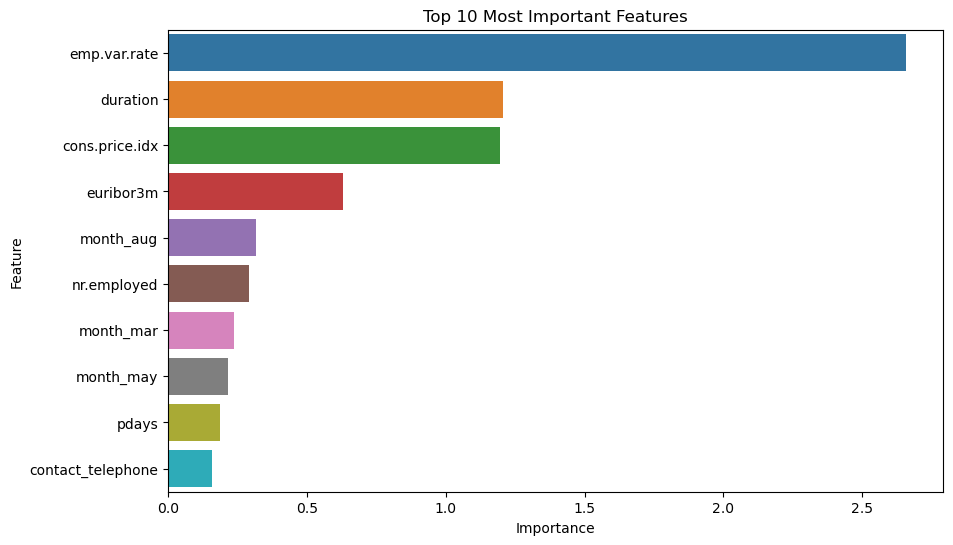

In [48]:
# Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Problem 9: Score the Model

What is the accuracy of your model?

In [50]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9113


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

Model Comparison:
                 Model  Fit Time (s)  Accuracy
0  Logistic Regression      0.155712  0.911265
1                  SVM     33.663492  0.909080
2                  KNN      0.009383  0.898155
3        Decision Tree      0.355289  0.886744


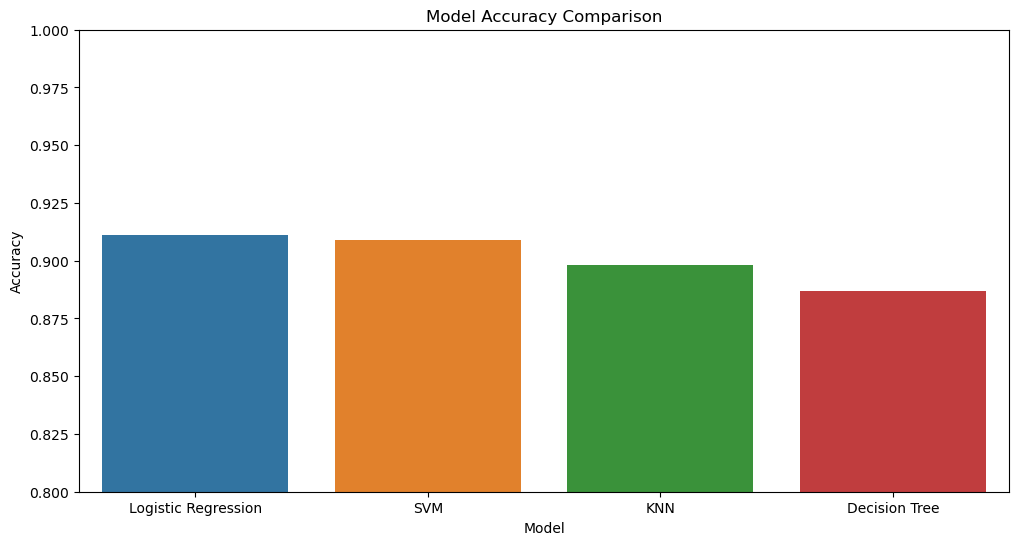

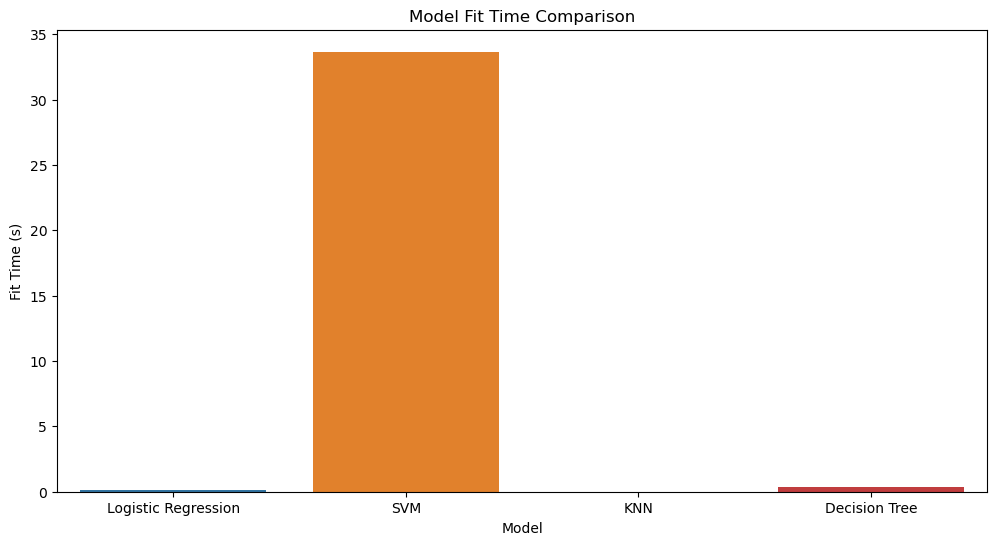


Detailed Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



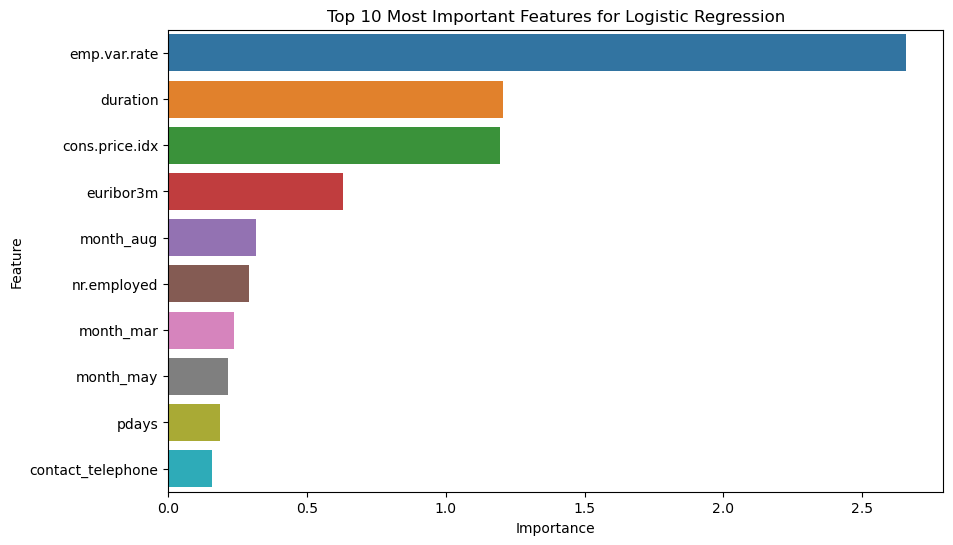

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Assuming the data loading and preprocessing steps are already done

# Function to train, predict, and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return fit_time, accuracy

# Create and evaluate models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

results = []

for name, model in models.items():
    fit_time, accuracy = train_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append({
        'Model': name,
        'Fit Time (s)': fit_time,
        'Accuracy': accuracy
    })

# Create DataFrame with results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("Model Comparison:")
print(results_df)

# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.ylim(0.8, 1)  # Adjust y-axis limits for better visualization
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Fit Time (s)', data=results_df)
plt.title('Model Fit Time Comparison')
plt.show()

# Print detailed classification report for the best performing model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
y_pred = best_model.predict(X_test_scaled)

print(f"\nDetailed Classification Report for {best_model_name}:")
print(classification_report(y_test, y_pred))

# Feature importance for the best model (if applicable)
if best_model_name in ['Logistic Regression', 'Decision Tree']:
    if best_model_name == 'Logistic Regression':
        importance = abs(best_model.coef_[0])
    else:  # Decision Tree
        importance = best_model.feature_importances_
    
    feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importance})
    feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(f'Top 10 Most Important Features for {best_model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Potential feature engineering and exploration ideas for improving the models: <br>
1. Age groups: Instead of using raw age values, we could create age groups (e.g., 18-25, 26-35, 36-45, etc.) to capture age-related patterns more effectively.
2. Education level: We could simplify the education categories by grouping them into broader categories like "basic", "intermediate", and "advanced".
3. Job categories: Some job categories might be combined if they have similar characteristics or impact on the target variable.
4. Contact duration: We could create bins for the "duration" feature to capture short, medium, and long interactions.

##### Questions